# DTSA 5509 
## Introduction to Machine Learning - Supervised Learning Final Project

## Introduction 


### Background

Every day, 2.9 million Americans fly over American airspace. It takes 45,000 planes to make sure they get to their destination. Many of you reading this project have traveled on a plane before and know that its not always the best experience. There are many factors that go into whether or not we have a enjoyable experience. Things from leg room to meal service, to in flight entertainment to how fast we get off the ground. As airlines try and maximize profits by comprimizing many areas of customer services, we are going to take a look at which ones make the most impact on customer satisfaction. 


### Data 

The data for this project was obtained from Kaggle. It contains the results from passenger satisfaction surveys. The link to the data can be found below. 

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data


### Objective 

The objective for this project is to find what factors are highly correlated to customer satisfaction and if we can create a machine learning model to predict this satisfaction. 

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score

### Load Data

In [8]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [166]:
df = pd.concat([df1, df2])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
df.size


3247000

In [11]:
df.shape


(129880, 25)

In [13]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [170]:
#check if any null values

df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [ ]:
#Remove null values

In [171]:
# Imputing missing value with mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())




In [31]:
df.isnull().values.any()

False

### Exploratory Data Analysis 

/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_38750/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

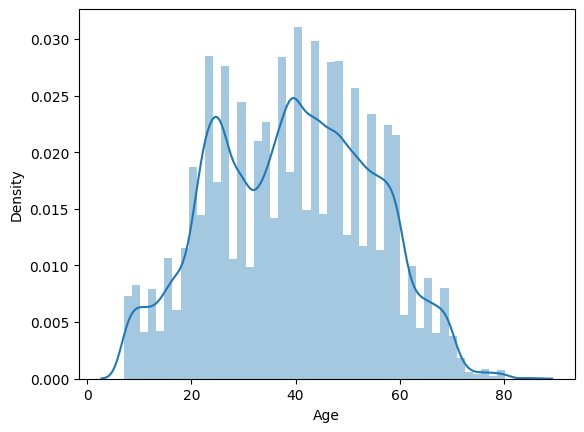

In [17]:
sns.distplot(df['Age'])

<Axes: xlabel='satisfaction', ylabel='Age'>

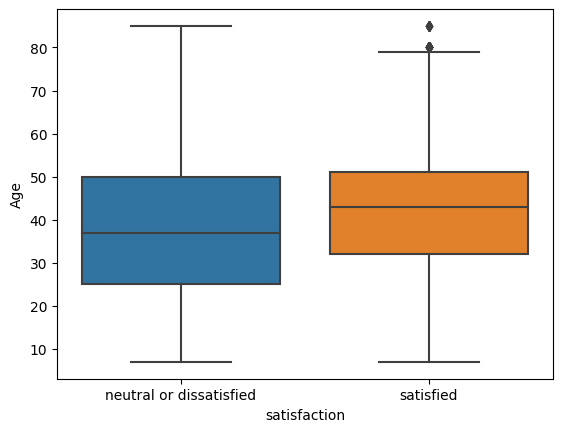

In [19]:
sns.boxplot(x="satisfaction", y="Age", data=df)

/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_38750/1268045742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight Distance'])


<Axes: xlabel='Flight Distance', ylabel='Density'>

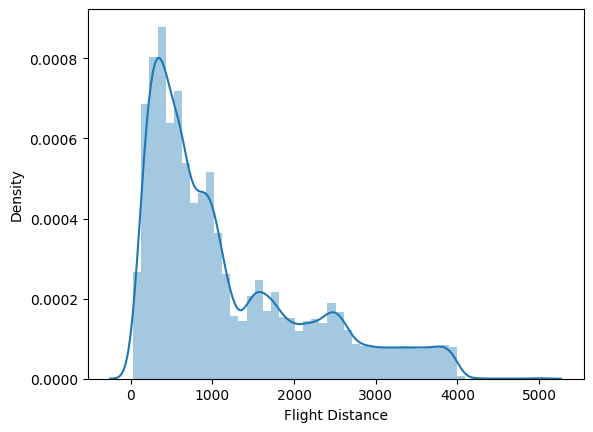

In [18]:
sns.distplot(df['Flight Distance'])


/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_38750/1097177571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cleanliness'])


<Axes: xlabel='Cleanliness', ylabel='Density'>

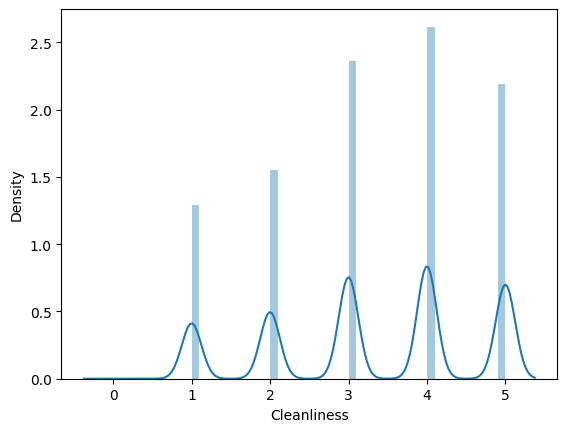

In [20]:
sns.distplot(df['Cleanliness'])


/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_38750/2068719482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Seat comfort'])


<Axes: xlabel='Seat comfort', ylabel='Density'>

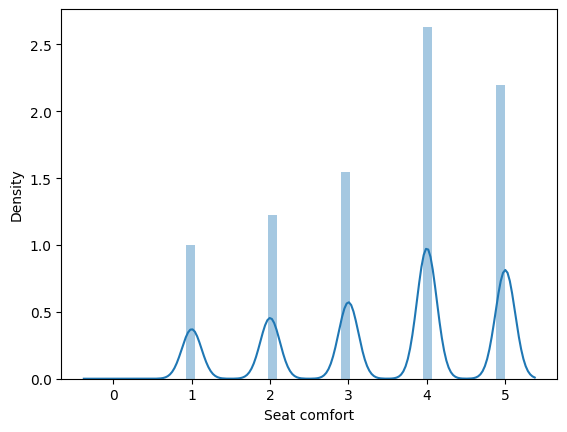

In [21]:
sns.distplot(df['Seat comfort'])


/var/folders/ql/wyzwd3sd5xq66k7bq607h2gm0000gn/T/ipykernel_38750/1868185809.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inflight entertainment'])


<Axes: xlabel='Inflight entertainment', ylabel='Density'>

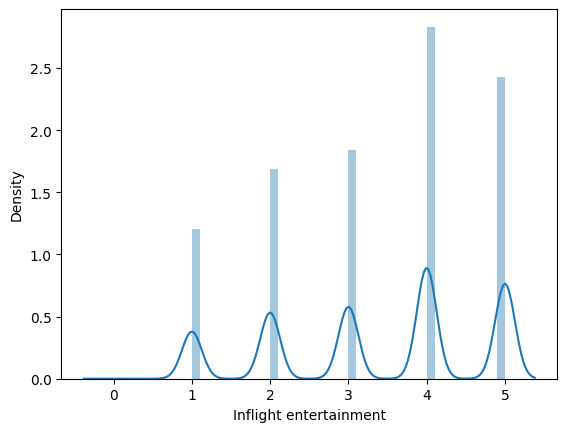

In [22]:
sns.distplot(df['Inflight entertainment'])


<Axes: xlabel='Inflight wifi service', ylabel='Density'>

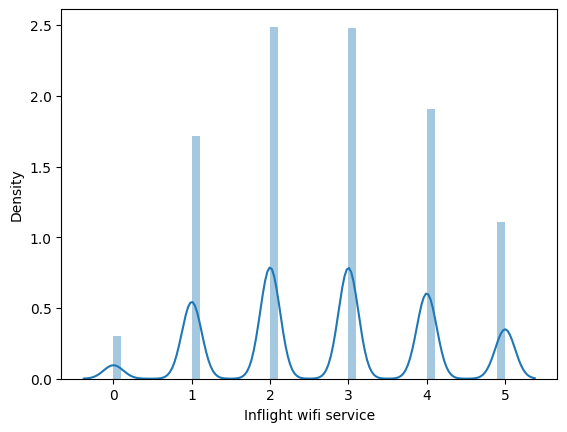

In [156]:
sns.distplot(df['Inflight wifi service'])

#### In flight wifi is mostly scored at 2 or 3. Meaning this service is mostly giving a disatisfied service to the customers

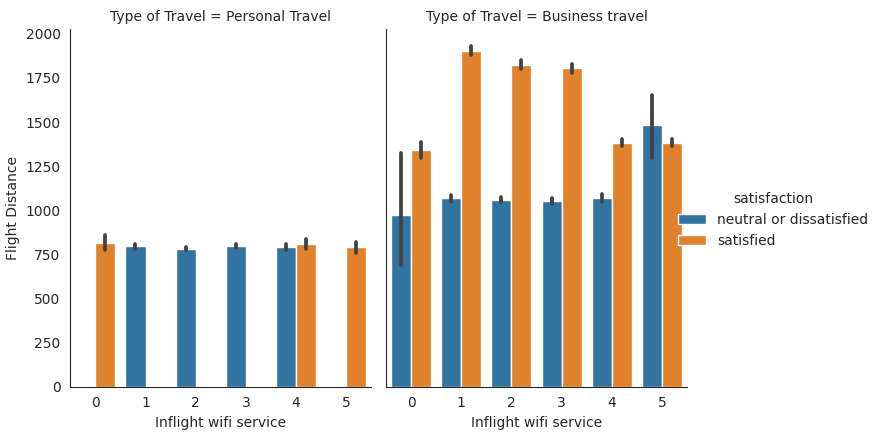

In [168]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", 
                    y="Flight Distance", 
                    hue="satisfaction", 
                    col="Type of Travel", data=df, 
                    kind="bar", height=4.5, aspect=.8)

#### Above we see that in flight wifi service is consistently rated among personal travel (1) when plotted against flight distance and Satisfaction levels show that good wifi service meant a satisfied customer. For business travel (0), a longer flight distance had higher satisfaction even if the in flight wifi service was only rated at a 1, 2 or 3. I would expect this to be because for longer flights people who are flying for business need to get work done, so any wifi on the plane is nice to have. 

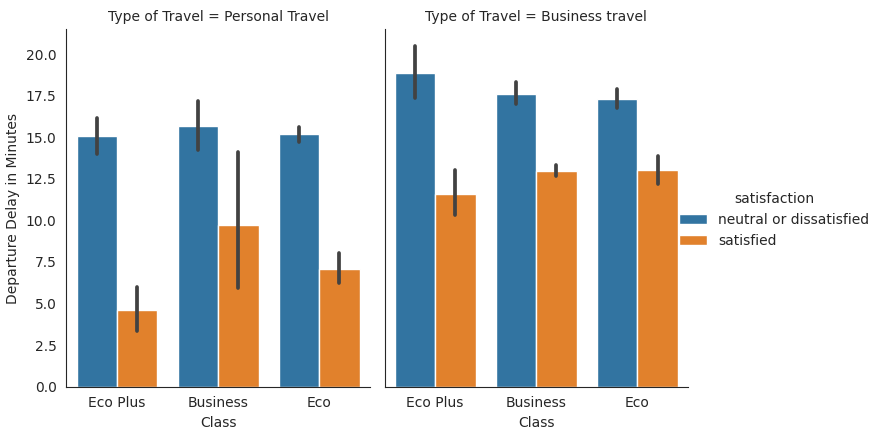

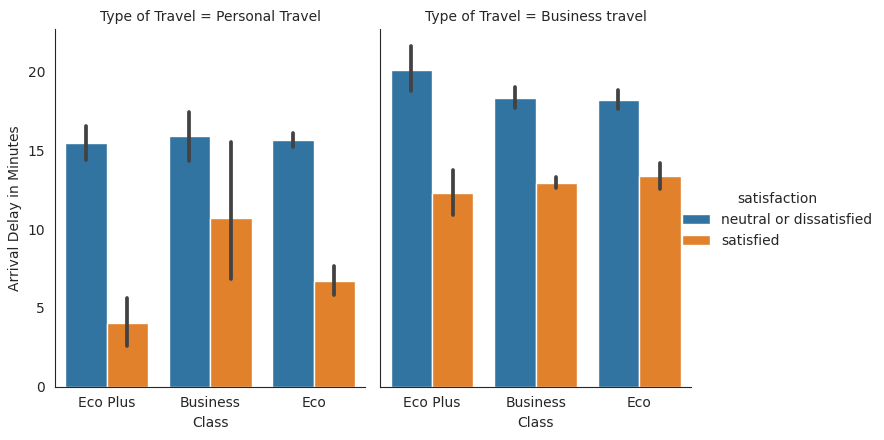

In [167]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=.8)

#### From the plot above, we see that neutral or dissatisfied customers make up the majority of customers by class when looking at arrival and departure delay. Eco Plus has the largest disparity between satisfaction levels across personal travel plots. 

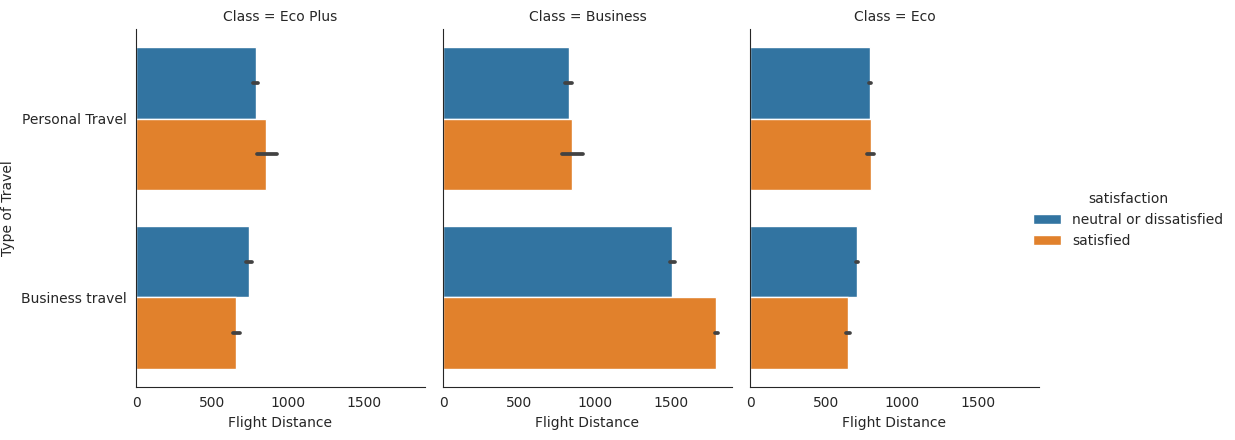

In [169]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", 
                    data=df, kind="bar", height=4.5, aspect=.8)

#### In the plot above, For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

<Axes: xlabel='Leg room service', ylabel='satisfaction'>

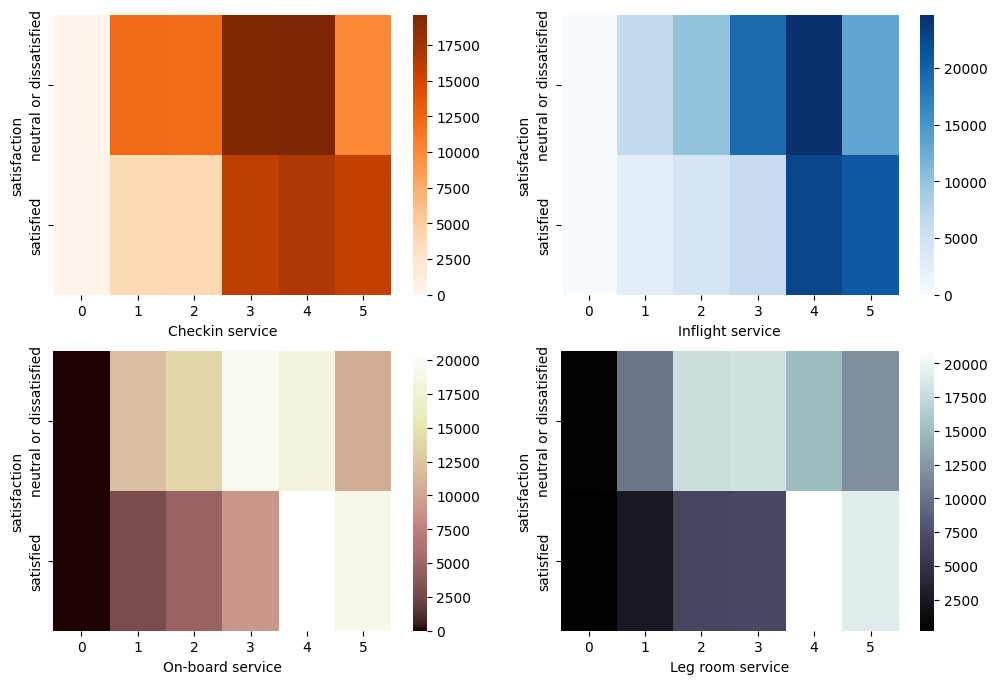

In [35]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(df['satisfaction'], df['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df['satisfaction'], df['On-board service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(df['satisfaction'], df['Leg room service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

Check in Service satisfaction - Many are satisfied, but alot are dissatisfied and giving 3-4 stars. 


On board service satisfaction - More satisfied customers giving rating 4 and 5 than dissatisfied. 


In flight service satisfaction - Both satisfied and dissatisfied customers giving 4 stars out of 5

Leg Room satisfaction - The dissatisfied customers gave mostly 2-3 stars. The satisfied customers giving 4 out of 5. 


These plots give us a good idea of how satisfied and dissatisfied customers rate different services. 

### Prep Data

In [36]:
# change satisfaction column to 0 or 1 

satisfaction= {'neutral or dissatisfied':0,'satisfied':1}

# apply using map
df['satisfaction'] = df['satisfaction'].map(satisfaction)

In [37]:
#Change Gender to 0 or 1 
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [38]:
Gender = {'Male':0, 
        'Female':1}

# apply using map
df['Gender'] = df['Gender'].map(Gender)

In [39]:
#Customer type 

CustomerType= {'Loyal Customer':0,'disloyal Customer':1}

# apply using map
df['Customer Type'] = df['Customer Type'].map(CustomerType)

In [40]:
#Type of travel 

TypeofTravel= {'Business travel':0,'Personal Travel':1}

# apply using map
df['Type of Travel'] = df['Type of Travel'].map(TypeofTravel)




In [41]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [42]:
#Ticket class 

Class= {'Business':0,'Eco':1,'Eco Plus':2}

# apply using map
df['Class'] = df['Class'].map(Class)

### Correlation Among Features 

<Axes: >

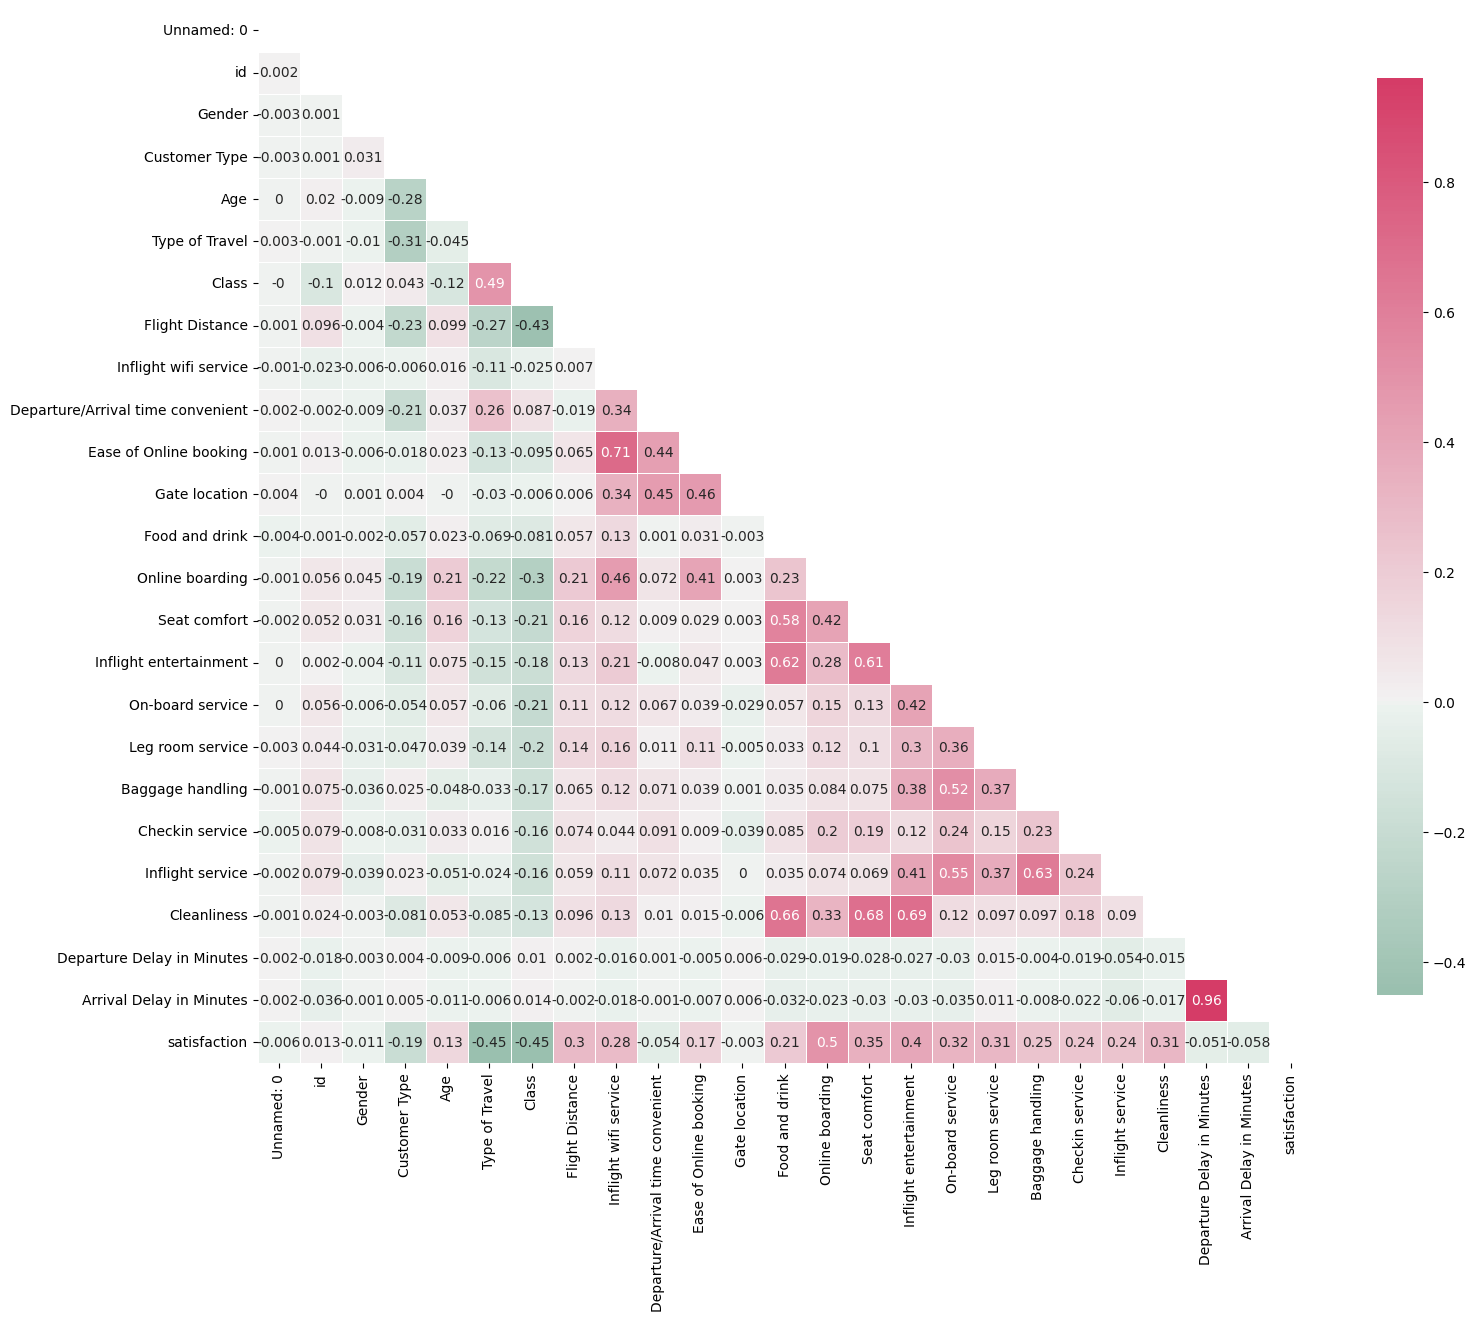

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = round(df.corr(),3)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(17, 17))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

#### In the plot above, we see that "Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". Cleanliness is highlyt correlated with seat comfort and inflight entertainment. We also see that Arrival delay is highly correlated with departure delay and this of course makes sense. There isnt a set of variables with a correlation close to 1 so we wont remove any variables. 



## Create Model

In [65]:
#Split data 
X = df.iloc[:, 0:24]
Y = df.iloc[:,24]

In [72]:
X.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,0,0,13,1,2,460,3,4,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,0,1,25,0,0,235,3,2,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,1,0,26,0,0,1142,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,1,0,25,0,0,562,2,5,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,0,0,61,0,0,214,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [73]:
Y = pd.DataFrame(Y)
Y.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression Model 

In [123]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
print(log.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, log.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, log.predict(X_test)))
print(F'Precision:', precision_score(Y_test, log.predict(X_test)))
print(F'Recall:', recall_score(Y_test, log.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, log.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, log.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, log.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, log.predict(X_test)) )
print()#Print a new line

LogisticRegression(random_state=0)
[0]Logistic Regression Training Accuracy: 0.8754427163535571
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14657
           1       0.87      0.83      0.85     11319

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Accuracy: 0.8742300585155528
Precision: 0.8739550436559539
Recall: 0.8312571781959537
F1 Score: 0.8520715417704325
Roc Auc Score: 0.8693367149081699
Balanced Accuracy Score: 0.8693367149081699
Confusion Matrix: [[13300  1357]
 [ 1910  9409]]



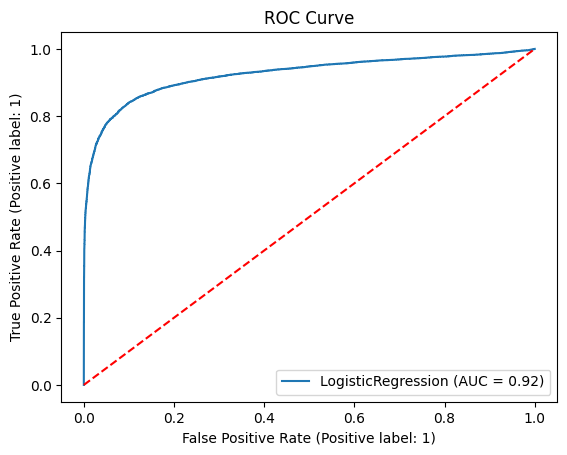

In [124]:
# ROC CURVE
RocCurveDisplay.from_estimator(
   log, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Logistic Regression Feature Importance 

In [121]:
import warnings
warnings.filterwarnings("ignore")

In [127]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(log.fit(X_train, Y_train)).fit(X_train,Y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1233 ± 0.0023,Type of Travel
0.0481 ± 0.0006,Customer Type
0.0451 ± 0.0010,Online boarding
0.0182 ± 0.0010,Inflight wifi service
0.0097 ± 0.0008,On-board service
0.0096 ± 0.0011,Checkin service
0.0062 ± 0.0009,Arrival Delay in Minutes
0.0056 ± 0.0006,Leg room service
0.0051 ± 0.0007,Class
0.0047 ± 0.0011,Cleanliness


### KNN Model

In [95]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
print(knn.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', knn.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, knn.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, knn.predict(X_test)))
print(F'Precision:', precision_score(Y_test, knn.predict(X_test)))
print(F'Recall:', recall_score(Y_test, knn.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, knn.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, knn.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, knn.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, knn.predict(X_test)) )
print()#Print a new line

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()
[0]Logistic Regression Training Accuracy: 0.9482310594394826
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14657
           1       0.95      0.89      0.91     11319

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Accuracy: 0.9275485063135201
Precision: 0.9451835078781017
Recall: 0.885060517713579
F1 Score: 0.9141345013231134
Roc Auc Score: 0.9227103775713968
Balanced Accuracy Score: 0.9227103775713968
Confusion Matrix: [[14076   581]
 [ 1301 10018]]



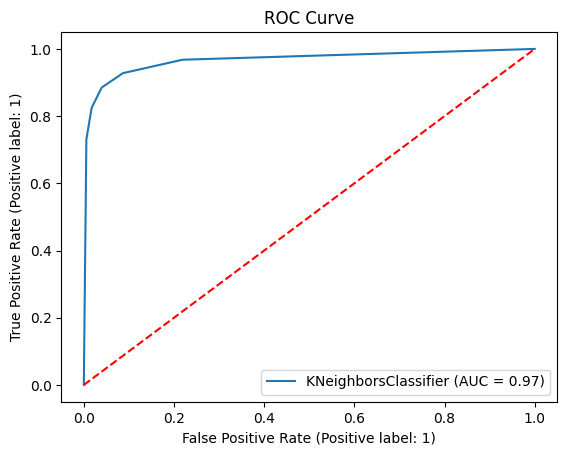

In [130]:
# ROC CURVE
RocCurveDisplay.from_estimator(
   knn, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Decision Tree Model 

In [129]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
print(tree.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', tree.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, tree.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, tree.predict(X_test)))
print(F'Precision:', precision_score(Y_test, tree.predict(X_test)))
print(F'Recall:', recall_score(Y_test, tree.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, tree.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, tree.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, tree.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, tree.predict(X_test)) )
print()#Print a new line

DecisionTreeClassifier(criterion='entropy', random_state=0)
[0]Logistic Regression Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14657
           1       0.94      0.94      0.94     11319

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Accuracy: 0.9489528795811518
Precision: 0.941738131022898
Recall: 0.9410725329092676
F1 Score: 0.9414052143172779
Roc Auc Score: 0.9480555405216323
Balanced Accuracy Score: 0.9480555405216324
Confusion Matrix: [[13998   659]
 [  667 10652]]



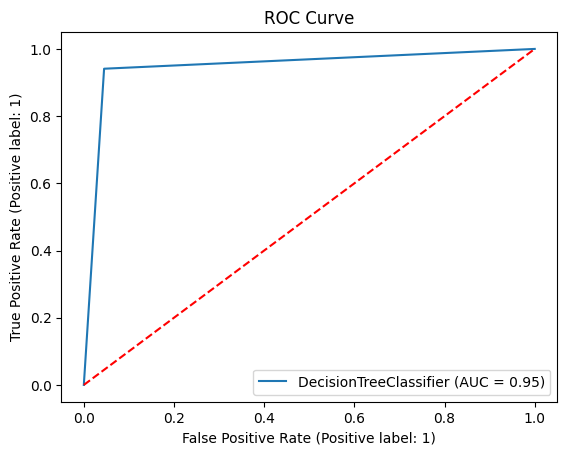

In [131]:
# ROC CURVE
RocCurveDisplay.from_estimator(
   tree, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Decision Tree Model Feature Importance 

In [143]:
perm_tree = PermutationImportance(tree.fit(X_train, Y_train)).fit(X_train,Y_train)
eli5.show_weights(perm_tree, feature_names = X.columns.tolist())

Weight,Feature
0.2108 ± 0.0015,Inflight wifi service
0.1844 ± 0.0013,Type of Travel
0.0908 ± 0.0018,Online boarding
0.0874 ± 0.0014,Customer Type
0.0597 ± 0.0006,Gate location
0.0569 ± 0.0011,Class
0.0433 ± 0.0009,Checkin service
0.0428 ± 0.0004,Inflight service
0.0417 ± 0.0005,Inflight entertainment
0.0402 ± 0.0014,Seat comfort


### Random Forest Model

In [133]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
print(forest.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', forest.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, forest.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, forest.predict(X_test)))
print(F'Precision:', precision_score(Y_test, forest.predict(X_test)))
print(F'Recall:', recall_score(Y_test, forest.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, forest.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, forest.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, forest.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, forest.predict(X_test)) )
print()#Print a new line

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)
[0]Logistic Regression Training Accuracy: 0.9971319679704342
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14657
           1       0.97      0.93      0.95     11319

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy: 0.9588466276562981
Precision: 0.9740980573543015
Recall: 0.930294195600318
F1 Score: 0.9516923494057572
Roc Auc Score: 0.9555953477831023
Balanced Accuracy Score: 0.9555953477831023
Confusion Matrix: [[14377   280]
 [  789 10530]]



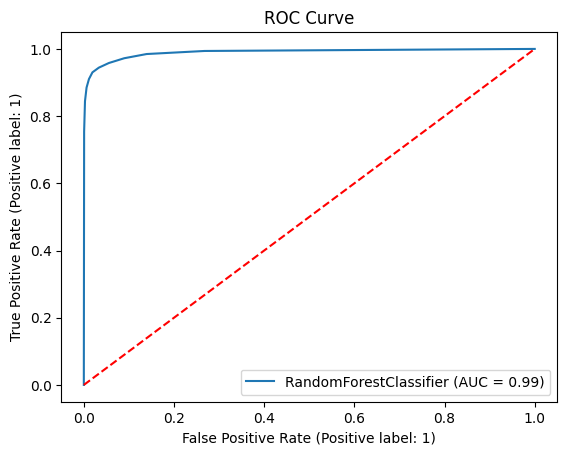

In [134]:
# ROC CURVE
RocCurveDisplay.from_estimator(
   forest, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Random Forest Feature Importance 

In [144]:
perm_forest = PermutationImportance(forest.fit(X_train, Y_train)).fit(X_train,Y_train)
eli5.show_weights(perm_forest, feature_names = X.columns.tolist())

Weight,Feature
0.1412 ± 0.0015,Inflight wifi service
0.1236 ± 0.0017,Type of Travel
0.0692 ± 0.0012,Class
0.0591 ± 0.0008,Customer Type
0.0461 ± 0.0012,Online boarding
0.0280 ± 0.0007,Checkin service
0.0231 ± 0.0005,Seat comfort
0.0225 ± 0.0004,Inflight entertainment
0.0219 ± 0.0002,Cleanliness
0.0182 ± 0.0006,id


### XGBoost Model

In [135]:
#Using xgboostr method of ensemble class to use xgboostClassification algorithm
import xgboost as xgb
x_gb= xgb.XGBClassifier(objective="binary:logistic", n_estimators=150, random_state=42, eval_metric=["auc", "error", "error@0.6"])
print(x_gb.fit(X_train, Y_train))
print('[0]Logistic Regression Training Accuracy:', x_gb.score(X_train, Y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(Y_test, x_gb.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(Y_test, x_gb.predict(X_test)))
print(F'Precision:', precision_score(Y_test, x_gb.predict(X_test)))
print(F'Recall:', recall_score(Y_test, x_gb.predict(X_test)))
print(F'F1 Score:', f1_score(Y_test, x_gb.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(Y_test, x_gb.predict(X_test)) )
print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, x_gb.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(Y_test, x_gb.predict(X_test)) )
print()#Print a new line

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=['auc', 'error', 'error@0.6'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
[0]Logistic Regression Training Accuracy: 0.9834943794271636
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14657
           1       0.97      0.95      0.

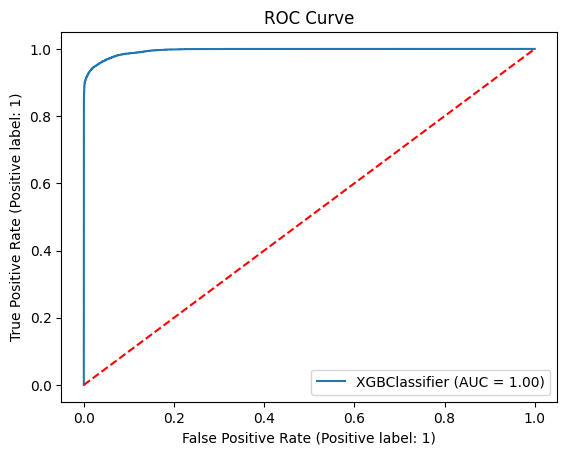

In [136]:
# ROC CURVE
RocCurveDisplay.from_estimator(
   x_gb, X_test, Y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### XGBoost Feature Importance 

In [145]:
perm_x_gb = PermutationImportance(x_gb.fit(X_train, Y_train)).fit(X_train,Y_train)
eli5.show_weights(perm_x_gb, feature_names = X.columns.tolist())

Weight,Feature
0.1740 ± 0.0008,Inflight wifi service
0.1554 ± 0.0020,Type of Travel
0.0782 ± 0.0012,Customer Type
0.0280 ± 0.0006,Online boarding
0.0199 ± 0.0002,Inflight service
0.0188 ± 0.0005,Baggage handling
0.0179 ± 0.0006,Checkin service
0.0161 ± 0.0005,Seat comfort
0.0125 ± 0.0006,id
0.0108 ± 0.0007,Class


### Conclusion

In [142]:
#Scores
acc = [0.87423,.92754,.94895,.95884,.96400]
prec = [.87395,.94518,.94173,.97409,.97054]
recall = [.83125,.88506,.94107,.93029,.94610]
f1 = [.85207,.91413,.94140,.95169,.95817]
roc_auc = [.86933,.92227,.94805,.95559,.96196]
       
       
       
       
results = pd.DataFrame([["Logistic Regression",acc[0],prec[0],recall[0],f1[0],roc_auc[0]],["K-Nearest Neighbor",acc[1],prec[1],recall[1],f1[1],roc_auc[1]],
                       ["DecisionTreeClassifier",acc[2],prec[2],recall[2],f1[2],roc_auc[2]],["RandomForestClassifie",acc[3],prec[3],recall[3],f1[3],roc_auc[3]],
                       ["xgboost",acc[4],prec[4],recall[4],f1[4],roc_auc[4]]],
                        columns = ["Models","Accuracy Score","Precision","Recall","F1 Score","ROC AUC Score"]).sort_values(by='Accuracy Score',ascending=False)


results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score,Precision,Recall,F1 Score,ROC AUC Score
4,xgboost,0.964000,0.970540,0.946100,0.958170,0.961960
3,RandomForestClassifie,0.958840,0.974090,0.930290,0.951690,0.955590
2,DecisionTreeClassifier,0.948950,0.941730,0.941070,0.941400,0.948050
1,K-Nearest Neighbor,0.927540,0.945180,0.885060,0.914130,0.922270
0,Logistic Regression,0.874230,0.873950,0.831250,0.852070,0.869330


In [154]:
#Feature Importance 

travel_weights = [.1233,.1844,.1236,.1554]

wifi_weights = [.0182,.2108,.1412,.1740]

result_feat = pd.DataFrame([["Logistic Regression",travel_weights[0],wifi_weights[0]],
                            ["Decision Tree",travel_weights[1],wifi_weights[2]],
                            ["Random Forest",travel_weights[2],wifi_weights[2]],
                            ["XG Boost",travel_weights[3],wifi_weights[3]]],
                            columns = ["Models","Type of Travel","In Flight Wifi"]).sort_values(by='In Flight Wifi',ascending=False)


result_feat.style.background_gradient(cmap='Blues')

,Models,Type of Travel,In Flight Wifi
3,XG Boost,0.155400,0.174000
1,Decision Tree,0.184400,0.141200
2,Random Forest,0.123600,0.141200
0,Logistic Regression,0.123300,0.018200
